# Módulo 7 Actividad 3

## Intención del aprendizaje esperado:

## Implementar un modelo predictivo utilizando redes neuronales convolutivas para el reconocimiento de imágenes en PythonEjercicios Planteados

**El conjunto de datos Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, con imágenes en escala de grises de 28x28 de 70 000 productos de moda de 10 categorías y 7000 imágenes por categoría. El conjunto de entrenamiento tiene 60.000 imágenes y el conjunto de prueba tiene 10.000 imágenes. ¡Puede verificar esto más tarde cuando haya cargado sus datos! ;)**

## Cargar los datos

**Keras viene con una biblioteca llamada datasets, que puede usar para cargar conjuntos de datos listos para usar: descarga los datos del servidor y acelera el proceso, ya que ya no tiene que descargar los datos a su computadora. Las imágenes del tren y de la prueba, junto con las etiquetas, se cargan y almacenan en las variables train_X, train_Y, test_X, test_Y, respectivamente.**

In [124]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU, BatchNormalization, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split


from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


## Realice lo siguiente:

**1. Obtenga el tamaño de los datos de prueba y testeo, además de las dimensiones de las imágenes.**

In [125]:
#print('Training data shape : ', train_X.shape, train_Y.shape)
#print('Testing data shape : ', test_X.shape, test_Y.shape)

print(' DESCRIPCION DE LA BASE DE DATOS '.center(50, '=') + '\n')
print('TRAIN X '.ljust(50, '_'))
print('Cantidad de elementos '.ljust(40, '.') + f' {train_X.shape[0]}'.rjust(10, '.'))
print('Dimensiones imágenes en pixeles: ALTO '.ljust(40) + f' {train_X.shape[1]}'.rjust(10, '.'))
print('Dimensiones imágenes en pixeles: ANCHO '.ljust(40) + f' {train_X.shape[2]}'.rjust(10, '.') + '\n')
print('TEST X '.ljust(50, '_'))
print('Cantidad de elementos '.ljust(40, '.') + f' {test_X.shape[0]}'.rjust(10, '.'))
print('Dimensiones imágenes en pixeles: ALTO '.ljust(40) + f' {test_X.shape[1]}'.rjust(10, '.'))
print('Dimensiones imágenes en pixeles: ANCHO '.ljust(40) + f' {test_X.shape[2]}'.rjust(10, '.') + '\n')
print('TRAIN LABELS '.ljust(50, '_'))
print('Cantidad de Elementos '.ljust(40, '.') + f' {len(train_Y)}'.rjust(10, '.') + '\n')
print('TEST LABELS '.ljust(50, '_'))
print('Cantidad de Elementos '.ljust(40, '.') + f' {len(test_Y)}'.rjust(10, '.') + '\n')
print('=' * 50)

======== DESCRIPCION DE LA BASE DE DATOS =========

TRAIN X __________________________________________
Cantidad de elementos ...................... 60000
Dimensiones imágenes en pixeles: ALTO   ....... 28
Dimensiones imágenes en pixeles: ANCHO  ....... 28

TEST X ___________________________________________
Cantidad de elementos ...................... 10000
Dimensiones imágenes en pixeles: ALTO   ....... 28
Dimensiones imágenes en pixeles: ANCHO  ....... 28

TRAIN LABELS _____________________________________
Cantidad de Elementos ...................... 60000

TEST LABELS ______________________________________
Cantidad de Elementos ...................... 10000



**2. Obtenga las categorías de la base**

In [126]:
clases = np.unique(train_Y)
nClases = len(clases)

print('Cantidad Total Clases: ', nClases)
print('Detalle de Clases: ', clases)

Cantidad Total Clases:  10
Detalle de Clases:  [0 1 2 3 4 5 6 7 8 9]


**3. Visualice sus datos.**

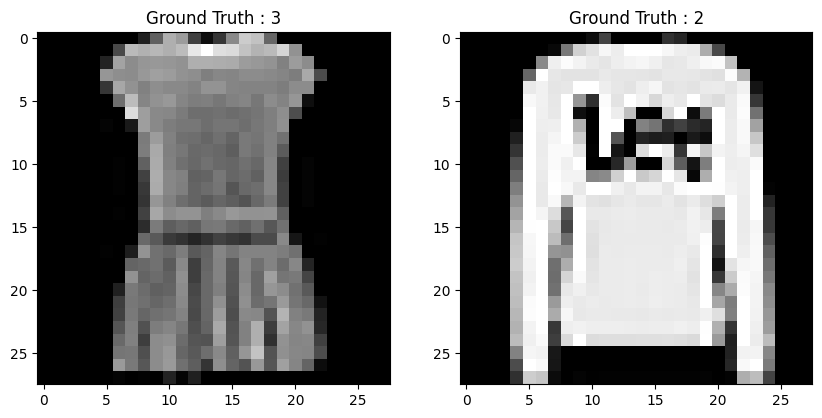

Se visualizan dos imágenes.  La primera corresponde a una muestra del grupo de entrenamiento, la segunda corresponde a una imagen del grupo de prueba.
"Ground Truth" se refiere a la etiqueta correspondiente a la imagen


In [127]:
plt.figure(figsize=[10, 10])

plt.subplot(121)
plt.imshow(train_X[3,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[3]))

plt.subplot(122)
plt.imshow(test_X[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[1]))

plt.show()


print('Se visualizan dos imágenes.  La primera corresponde a una muestra del grupo de entrenamiento, la segunda corresponde a una imagen del grupo de prueba.')
print('"Ground Truth" se refiere a la etiqueta correspondiente a la imagen')

**4. Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe convertir su tipo a float32, y también debe volver a escalar los valores de píxel en el rango 0 - 1 inclusive.**

In [128]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.0
test_X = test_X / 255.0

**5. Convierta las etiquetas de entrenamiento y prueba en vectores de codificación one-hot.**

In [129]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('=' * 77 + '\n')
print('Valor Original de Etiqueta'.ljust(45, '.') + f' {train_Y[0]}'.rjust(32, '.') + '\n')
print('Etiqueta Convertida a One-Hot Encoding '.ljust(45, '.') + f' {train_Y_one_hot[0]}'.rjust(30, '.'))
print('\n' + '=' * 77)


Valor Original de Etiqueta................................................. 9

Etiqueta Convertida a One-Hot Encoding ...... [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]



**6. Separar datos de entrenamiento y testeo**

In [130]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

**8. Usará un tamaño de lote de 64 y también es preferible usar un tamaño de lote más alto de 128 o 256, todo depende de la memoria. Contribuye enormemente a determinar los parámetros de aprendizaje y afecta la precisión de la predicción. Entrenarás la red durante 20 épocas.**

**9. Agregue la capa de agrupación máxima con MaxPooling2D() y así sucesivamente.**

In [131]:
batch_size = 64
epochs = 20
num_clases = 10

modelo_red_neuronal_mnist = Sequential()

modelo_red_neuronal_mnist.add(Input(shape=(28, 28, 1)))
modelo_red_neuronal_mnist.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
modelo_red_neuronal_mnist.add(LeakyReLU(negative_slope=0.1))
modelo_red_neuronal_mnist.add(MaxPooling2D((2, 2),padding='same'))
modelo_red_neuronal_mnist.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
modelo_red_neuronal_mnist.add(LeakyReLU(negative_slope=0.1))
modelo_red_neuronal_mnist.add(MaxPooling2D((2, 2),padding='same'))
modelo_red_neuronal_mnist.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
modelo_red_neuronal_mnist.add(LeakyReLU(negative_slope=0.1))
modelo_red_neuronal_mnist.add(MaxPooling2D((2, 2),padding='same'))
modelo_red_neuronal_mnist.add(Flatten())
modelo_red_neuronal_mnist.add(Dense(128,activation="linear"))
modelo_red_neuronal_mnist.add(Dropout(0.5))
modelo_red_neuronal_mnist.add(LeakyReLU(negative_slope=0.1))
modelo_red_neuronal_mnist.add(Dense(num_clases, activation='softmax'))




**10. Compilación y visualización del modelo.**

In [132]:
modelo_red_neuronal_mnist.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelo_red_neuronal_mnist.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Esta parte no estaba incluida en el ejercicio y pienso que debe ser por lo que tarda en cargar.  Para el caso de el entrenamiento, en mi laptop tardó 14 minutos.

In [133]:
mnist_entrenamiento = modelo_red_neuronal_mnist.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.7191 - loss: 0.7727 - val_accuracy: 0.8768 - val_loss: 0.3416
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.8768 - loss: 0.3388 - val_accuracy: 0.8970 - val_loss: 0.2782
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 49ms/step - accuracy: 0.8982 - loss: 0.2796 - val_accuracy: 0.9042 - val_loss: 0.2576
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9108 - loss: 0.2456 - val_accuracy: 0.9091 - val_loss: 0.2506
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9187 - loss: 0.2234 - val_accuracy: 0.9123 - val_loss: 0.2315
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9245 - loss: 0.2042 - val_accuracy: 0.9155 - val_loss: 0.2259
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9353 - loss: 0.1782 - val_accuracy: 0.9208 - val_loss: 0.2292
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9392 - loss: 0.1613 - 

In [134]:
test_eval = modelo_red_neuronal_mnist.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Pérdida en la prueba:', test_eval[0])
print('Precisión en la prueba:', test_eval[1])

Pérdida en la prueba: 0.37761592864990234
Precisión en la prueba: 0.9171000123023987
